In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import scale, robust_scale 
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read_csv(filename: str) -> []:
    df = pd.read_csv(filename) # (4803, 7) -> (1493, 7)
    df = df[['budget', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']].dropna(axis=0,how='any')
    return np.array(df)

datas = read_csv('./data/tmdb_5000_movies.csv')

original_language_dict = {}
for data in datas:
    if not original_language_dict.get(data[1]):
        original_language_dict[data[1]] = len(original_language_dict)

for idx, data in enumerate(datas):
    datas[idx][1] = original_language_dict[datas[idx][1]]

datas = datas.astype(np.float32)
datas = scale(datas, axis=1)
# datas = robust_scale(datas, axis=1)
print(datas.shape)

print(np.max(datas.T, axis=1))
print(np.min(datas.T, axis=1))
print(np.std(datas.T, axis=1))
print(np.average(datas.T, axis=1))

(4801, 7)
[2.44949   2.4494898 1.0376213 2.44949   2.4494603 2.4301028 2.445303 ]
[-0.8830631  -0.90489537 -1.0380327  -0.92598075 -0.8830631  -1.0039402
 -0.67664737]
[1.0881698  0.17526506 0.08315782 1.2663264  1.0331156  0.17687024
 0.56592894]
[ 0.7207959  -0.5104646  -0.51196337  1.1671913  -0.04678602 -0.49256605
 -0.3262071 ]


e:\program files (x86)\python\python36\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
e:\program files (x86)\python\python36\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


2019-11-23 03:33:53.737971
2019-11-23 03:33:53.840734
4801 -> Counter({0: 3875, 1: 831, -1: 77, 4: 8, 3: 3, 6: 3, 2: 2, 5: 2})


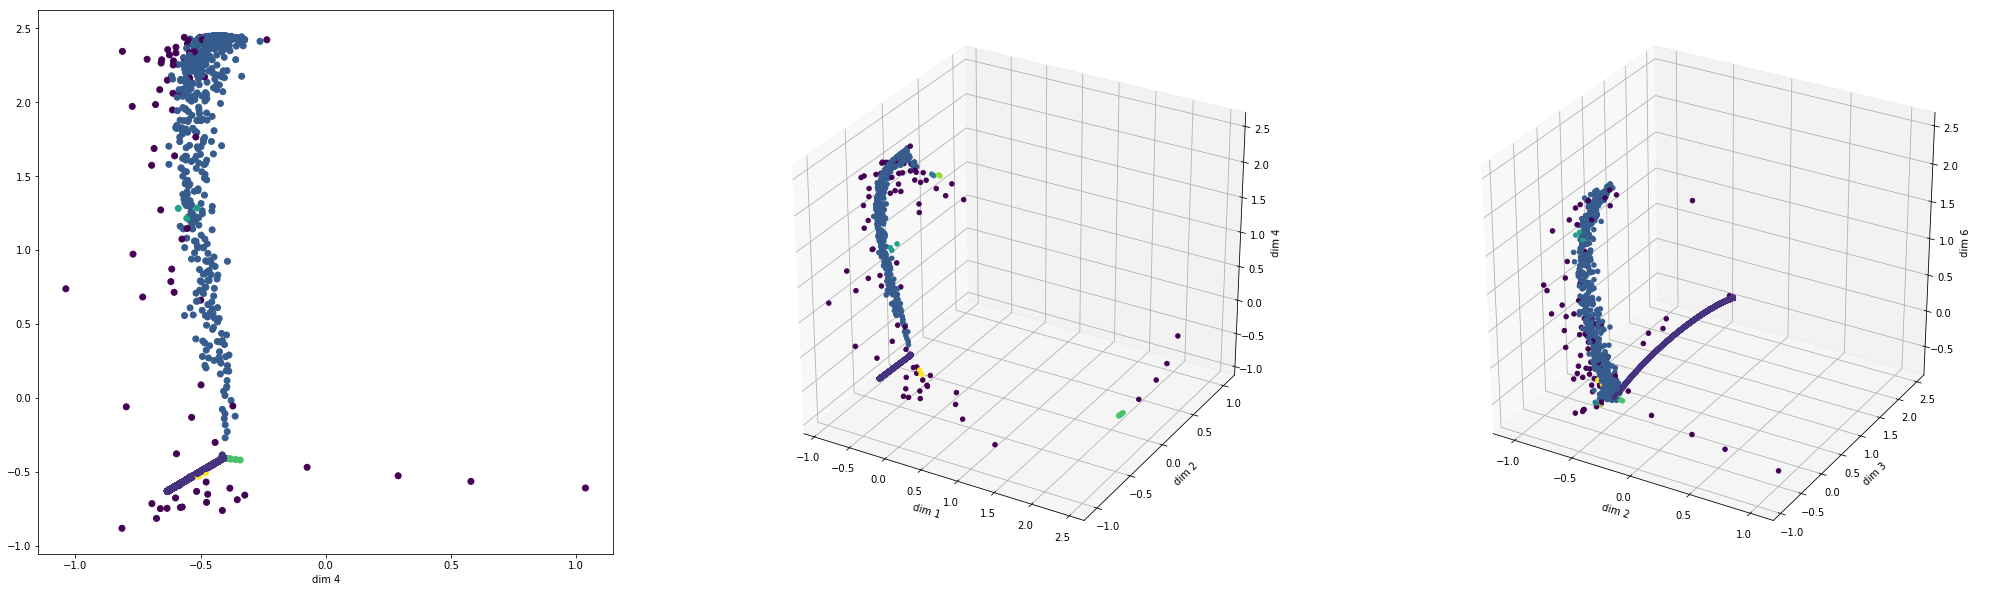

In [3]:
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f'))

y_pred = DBSCAN(eps = .1, min_samples = 2).fit_predict(datas)  # numpy.ndarray

print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f'))
from collections import Counter
print(len(datas), '->', Counter(y_pred))

plt.figure(figsize=(35, 10))
fig = plt.subplot(131)
fig.set_xlabel('dim 2')
fig.set_xlabel('dim 4')
fig.scatter(datas[:, 2], datas[:, 4], c=y_pred)

fig = plt.subplot(132, projection='3d')
fig.set_xlabel('dim 1')
fig.set_ylabel('dim 2')
fig.set_zlabel('dim 4')
fig.scatter(datas[:, 1], datas[:, 2], datas[:, 4], c=y_pred, alpha=1)

fig = plt.subplot(133, projection='3d')
fig.set_xlabel('dim 2')
fig.set_ylabel('dim 3')
fig.set_zlabel('dim 6')
fig.scatter(datas[:, 2], datas[:, 3], datas[:, 6], c=y_pred, alpha=1)

plt.savefig('sklearn_dbscan.pdf')
plt.show()